This notebook will compute the noise-marginalized optimal statistic S/N. It will reproduce Figure 4 in the NANOGrav 15-year GWB paper.

You will need to download the data from Google drive: https://drive.google.com/file/d/19I8qAnLCrCo7PBa5k5rXUG27U9S7LkWS/view?usp=sharing. Unpack the file `correlations.tar.gz` and then load the correlations from `correlations_gamma4p33_nfreq14.npz` and `correlations_variedgamma_nfreq14.npz`.

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker as mticker
%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
plt.rcParams.update(plt.rcParamsDefault)
with open('../ng15_rcparams.json', 'rb') as f:
    plt.rcParams.update(json.load(f))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

In [4]:
def load_npzfile(filename):
    
    npzfile = np.load(filename)
    
    xi = npzfile['xi']
    rho = npzfile['rho']
    sig = npzfile['sig']
    
    hd = npzfile['hd']
 
    return xi, rho, sig, hd

In [5]:
def compute_os(corr, rho, sig):
    
    OS = np.array([(np.sum(rho[i,:]*corr / sig[i,:] ** 2) / np.sum(corr ** 2 / sig[i,:] ** 2)) 
                  for i in range(rho.shape[0])])
    OS_sig = np.array([1 / np.sqrt(np.sum(corr ** 2 / sig[i,:] ** 2)) for i in range(rho.shape[0])])
    
    return OS, OS_sig

In [7]:
# specify directory where the correlations are located
datadir = './correlations/'

xi_fg, rho_fg, sig_fg, hd_fg = load_npzfile(datadir + 'correlations_gamma4p33_nfreq14.npz')
OS_fg, sig_fg = compute_os(hd_fg, rho_fg, sig_fg)

xi_vg, rho_vg, sig_vg, hd_vg = load_npzfile(datadir + 'correlations_variedgamma_nfreq14.npz')
OS_vg, sig_vg = compute_os(hd_vg, rho_vg, sig_vg)

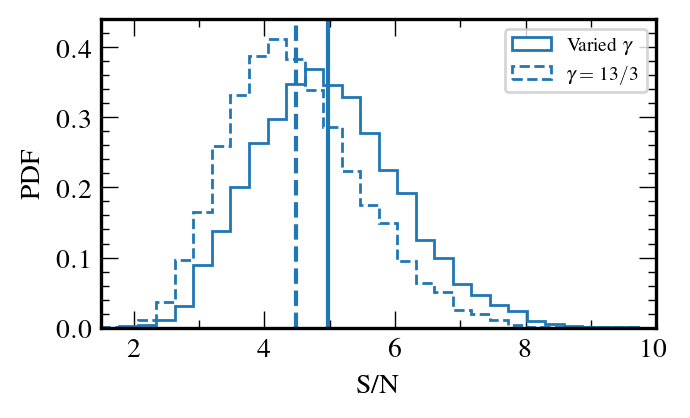

Optimal statistic mean S/N:
	4.983 (varied gamma)
	4.486 (gamma = 13/3)


In [8]:
fig, ax = plt.subplots(1, 1)

ax.hist(OS_vg/sig_vg, histtype='step', bins=30, range=(1.5,10), density=True,
            color='C0', label=r'Varied $\gamma$', rasterized=True)
ax.hist(OS_fg/sig_fg, histtype='step', bins=30, range=(1.5,10), density=True,
            color='C0', ls='--', label=r'$\gamma = 13/3$', rasterized=True)

ax.axvline(np.mean(OS_vg/sig_vg), color='C0', ls='-')
ax.axvline(np.mean(OS_fg/sig_fg), color='C0', ls='--')

ax.set_xlabel('S/N')
ax.set_xlim((1.5,10))
ax.set_ylim((0.0, 0.44))

ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))

ax.legend()
ax.set_ylabel('PDF')

plt.tight_layout()
plt.show()

# plt.savefig('optstat.pdf', bbox_inches='tight');

print('Optimal statistic mean S/N:')
print('\t{0:.3f} (varied gamma)'.format(np.mean(OS_vg/sig_vg)))
print('\t{0:.3f} (gamma = 13/3)'.format(np.mean(OS_fg/sig_fg)))